# <center>Parkinson's Disease Detection</center>

## Overview:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

## Dataset Information:

Dataset: [Kaggle - Parkinsons Disease Detection](https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection)

### Independent Feature:
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
### Dependent Features:
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude
* NHR, HNR - Two measures of ratio of noise to tonal components in the voice
* RPDE, D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation

### Training : Testing :: 156 : 39 :: 80 : 20

### Evaluation Metrics Considered:
* Accuracy, Precision, Recision, F1 Score, ROC AUC Curve

# 1. Importing Required Libraries
* NumPy: For numerical computations and array manipulation.
* Pandas: For data manipulation and analysis.
* Seaborn: For statistical data visualization.
* Matplotlib: For creating plots and visualizations.
* Scikit-learn: For machine learning algorithms and evaluation metrics.
* XGBoost: For Extreme gradient boosting machine learning.
* Catboost: For CatBoosting machine learning.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# 2. Data Ingestion

In [2]:
df=pd.read_csv('Data/parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# 3. Data Exploration

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

# 4. Data Preprocessing

### 4.1 Removing Unnecessary Features

In [9]:
df = df.drop("name",axis=1)

### 4.2 Feature Classification

In [10]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [11]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Categorical Features:  []


In [12]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]

### 4.3 Training and Testing Data Preparation

In [13]:
x=df.drop(labels=['status'],axis=1)
y=df['status']

In [14]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### 4.4 Checking for Feature Multi-Collinearity

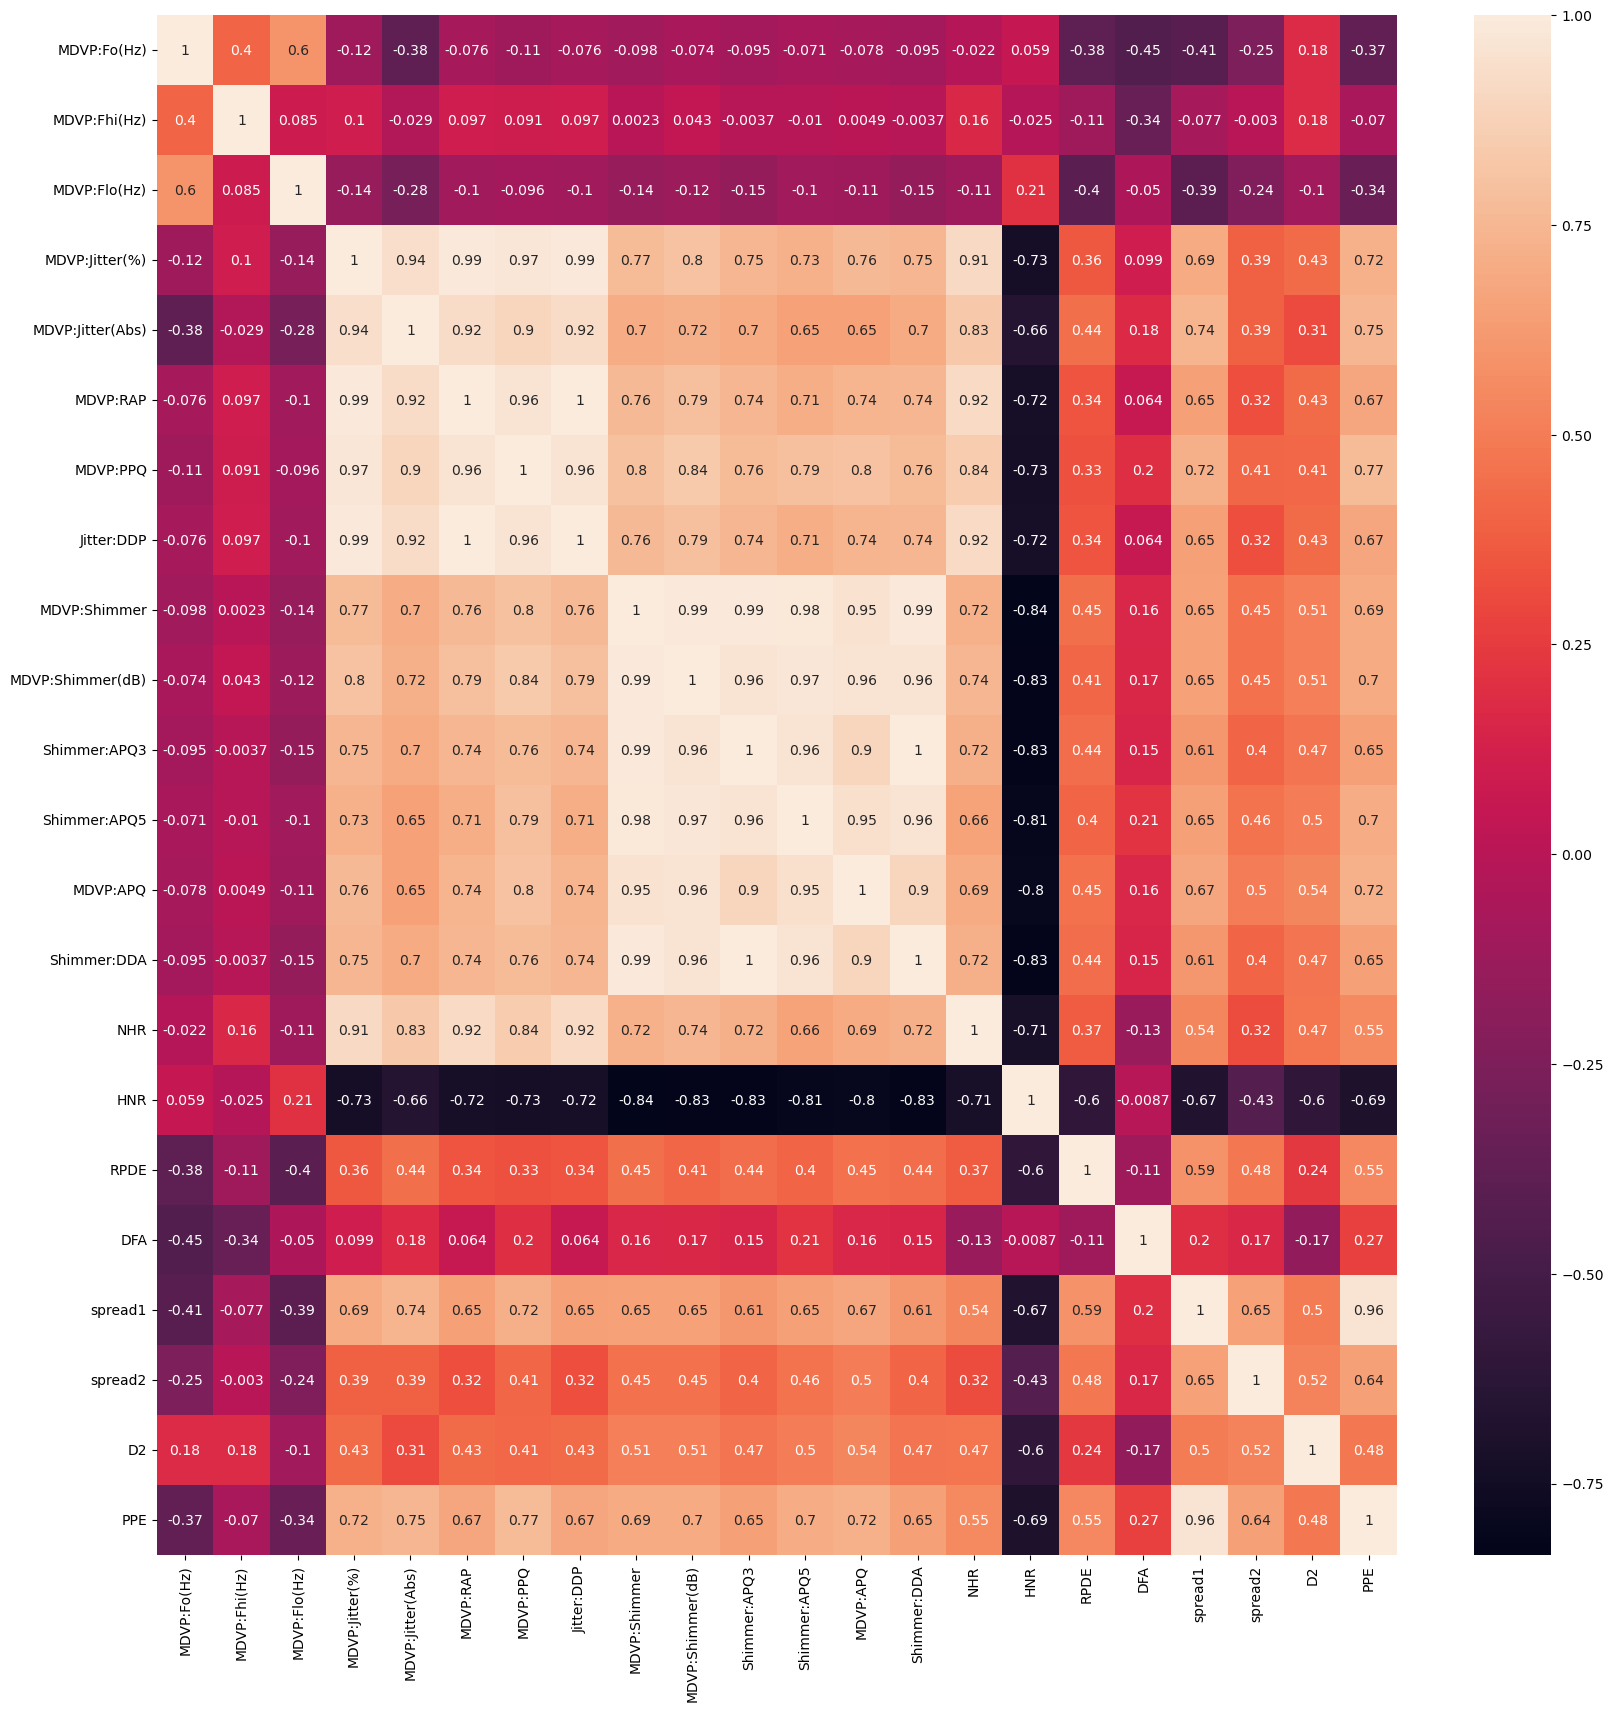

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [16]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features=correlation(x,0.7)
print(corr_features)
len(set(corr_features))

{'MDVP:Jitter(Abs)', 'Shimmer:APQ5', 'MDVP:APQ', 'PPE', 'MDVP:PPQ', 'NHR', 'Jitter:DDP', 'MDVP:RAP', 'Shimmer:APQ3', 'Shimmer:DDA', 'spread1', 'HNR', 'MDVP:Shimmer(dB)', 'MDVP:Shimmer'}


14

In [18]:
x=x.drop(corr_features,axis=1)

In [19]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread2,D2
0,119.992,157.302,74.997,0.00784,0.414783,0.815285,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.458359,0.819521,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.429895,0.825288,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.434969,0.819235,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.417356,0.823484,0.234513,2.332180
...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.448439,0.657899,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.431674,0.683244,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.407567,0.655683,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.451221,0.643956,0.207454,2.138608


In [20]:
x.rename(columns={
    'MDVP:Fo(Hz)': 'MDVPFO',
    'MDVP:Fhi(Hz)': 'MDVPFHI',
    'MDVP:Flo(Hz)': 'MDVPFLO',
    'MDVP:Jitter(%)': 'MDVPJ'
}, inplace=True)

In [21]:
x

,MDVPFO,MDVPFHI,MDVPFLO,MDVPJ,RPDE,DFA,spread2,D2
0,119.992,157.302,74.997,0.00784,0.414783,0.815285,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.458359,0.819521,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.429895,0.825288,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.434969,0.819235,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.417356,0.823484,0.234513,2.332180
...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.448439,0.657899,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.431674,0.683244,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.407567,0.655683,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.451221,0.643956,0.207454,2.138608


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 5. Modelling

### 5.1 Model Training

In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'XG Boost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Extra Tree': ExtraTreesClassifier()
}

In [24]:
model_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Training Accuracy: ",train_accuracy)
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)


    model_list.append(model_name)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)

max_accuracy_index = test_accuracy_list.index(max(test_accuracy_list))
print(f"\nThe best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {test_accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy:  0.8525641025641025
Testing Accuracy:  0.8974358974358975
Precision:  0.8787878787878788
Recall:  1.0
F1 Score:  0.9354838709677419
Model: Naive Bayes
Training Accuracy:  0.7948717948717948
Testing Accuracy:  0.8461538461538461
Precision:  0.896551724137931
Recall:  0.896551724137931
F1 Score:  0.896551724137931
Model: XG Boost
Training Accuracy:  1.0
Testing Accuracy:  0.9230769230769231
Precision:  1.0
Recall:  0.896551724137931
F1 Score:  0.9454545454545454
Model: Random Forest
Training Accuracy:  1.0
Testing Accuracy:  0.9743589743589743
Precision:  0.9666666666666667
Recall:  1.0
F1 Score:  0.9830508474576272
Model: Gradient Boosting
Training Accuracy:  1.0
Testing Accuracy:  0.9487179487179487
Precision:  0.9354838709677419
Recall:  1.0
F1 Score:  0.9666666666666667
Model: Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.9230769230769231
Precision:  0.9333333333333333
Recall:  0.9655172413793104
F1 Score:  0.9491525423728814

In [25]:
results = {
    'Model': model_list,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
}

results = pd.DataFrame(results)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.852564,0.897436,0.878788,1.000000,0.935484
1,Naive Bayes,0.794872,0.846154,0.896552,0.896552,0.896552
2,XG Boost,1.000000,0.923077,1.000000,0.896552,0.945455
3,Random Forest,1.000000,0.974359,0.966667,1.000000,0.983051
4,Gradient Boosting,1.000000,0.948718,0.935484,1.000000,0.966667
5,Decision Tree,1.000000,0.923077,0.933333,0.965517,0.949153
6,K Nearest Neighbors,0.884615,0.871795,0.875000,0.965517,0.918033
7,Extra Tree,1.000000,0.948718,0.965517,0.965517,0.965517


### 5.2 HyperParamter Tuning

In [26]:
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Naive Bayes': {},
    'XG Boost': {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
    'K Nearest Neighbors': {'n_neighbors': [3, 5, 10]},
    'Extra Tree': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
}

In [27]:
modelss =[]
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
        
        grid_search.fit(x_train, y_train)
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"\nBest parameters for {model_name}: {best_params}")
        
        y_train_pred = best_model_cv.predict(x_train)
        y_pred = best_model_cv.predict(x_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        modelss.append(model_name)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        
        print(f"Train Accuracy for {model_name}: {train_accuracy}")
        print(f"Test Accuracy for {model_name}: {test_accuracy}")
        print(f"Precision for {model_name}: {precision}")
        print(f"Recall for {model_name}: {recall}")
        print(f"F1 Score for {model_name}: {f1}")
        print("=" * 35)

best_test_accuracy_index = test_accuracies.index(max(test_accuracies))
print(f"We got {modelss[best_test_accuracy_index]} as highest test acuracy of {test_accuracies[best_test_accuracy_index]}")


Best parameters for Logistic Regression: {'C': 1}
Train Accuracy for Logistic Regression: 0.8525641025641025
Test Accuracy for Logistic Regression: 0.8974358974358975
Precision for Logistic Regression: 0.8787878787878788
Recall for Logistic Regression: 1.0
F1 Score for Logistic Regression: 0.9354838709677419

Best parameters for Naive Bayes: {}
Train Accuracy for Naive Bayes: 0.7948717948717948
Test Accuracy for Naive Bayes: 0.8461538461538461
Precision for Naive Bayes: 0.896551724137931
Recall for Naive Bayes: 0.896551724137931
F1 Score for Naive Bayes: 0.896551724137931

Best parameters for XG Boost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Train Accuracy for XG Boost: 1.0
Test Accuracy for XG Boost: 0.8717948717948718
Precision for XG Boost: 0.9285714285714286
Recall for XG Boost: 0.896551724137931
F1 Score for XG Boost: 0.9122807017543859

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 300}
Train Accuracy for Random Forest: 1.0
Test Accurac

In [28]:
results1 = {
    'Model': modelss,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
}

results1 = pd.DataFrame(results1)
results1

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.852564,0.897436,0.878788,1.000000,0.935484
1,Naive Bayes,0.794872,0.846154,0.896552,0.896552,0.896552
2,XG Boost,1.000000,0.871795,0.928571,0.896552,0.912281
3,Random Forest,1.000000,0.974359,0.966667,1.000000,0.983051
4,Gradient Boosting,1.000000,0.923077,0.933333,0.965517,0.949153
5,Decision Tree,1.000000,0.923077,0.933333,0.965517,0.949153
6,K Nearest Neighbors,0.858974,0.846154,0.896552,0.896552,0.896552
7,Extra Tree,1.000000,0.974359,0.966667,1.000000,0.983051


### ROC AUC Curve Representation

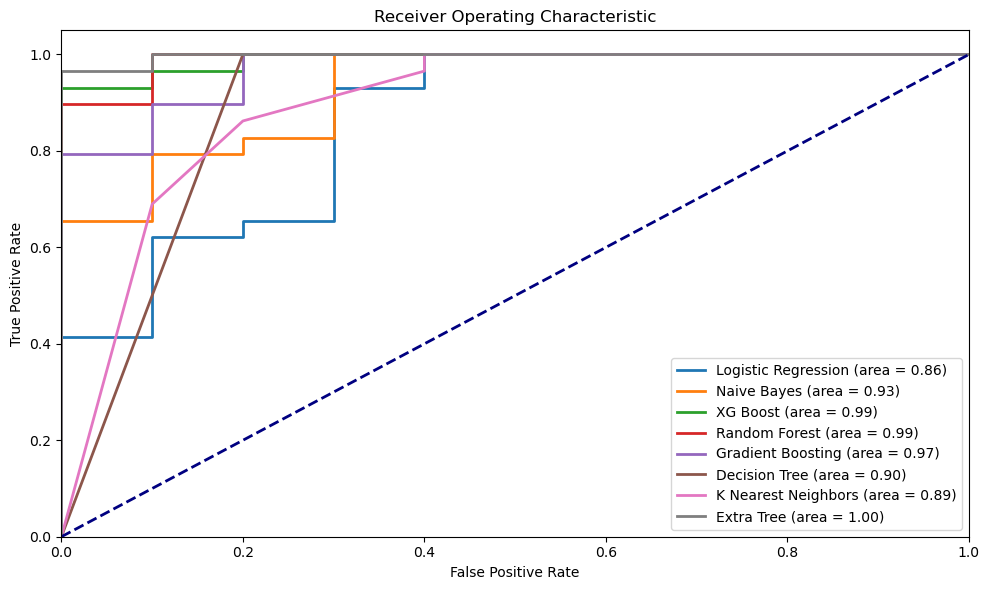

In [29]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))


fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    plot_roc_curve(ax, y_test, y_score, model_name)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [32]:
best_model = models['Extra Tree']
pickle.dump(best_model,open('Parkinsons_Model.pkl','wb'))